### Context
---

Although this dataset was originally contributed to the UCI Machine Learning repository nearly 30 years ago, mushroom hunting (otherwise known as "shrooming") is enjoying new peaks in popularity. Learn which features spell certain death and which are most palatable in this dataset of mushroom characteristics. And how certain can your model be?

### Content
---

This dataset includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family Mushroom drawn from The Audubon Society Field Guide to North American Mushrooms (1981). Each species is identified as definitely edible, definitely poisonous, or of unknown edibility and not recommended. This latter class was combined with the poisonous one. The Guide clearly states that there is no simple rule for determining the edibility of a mushroom; no rule like "leaflets three, let it be'' for Poisonous Oak and Ivy.

### Data Overview
---

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv('../Data/mushrooms.csv')

In [3]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


### Converting Categorical Features to Numeric
---

In [4]:
from sklearn.preprocessing import LabelEncoder

In [5]:
le = LabelEncoder()

categorical = df.columns

for cat in categorical:
    df[cat] = le.fit_transform(df[cat])

### First Look at the Data
---

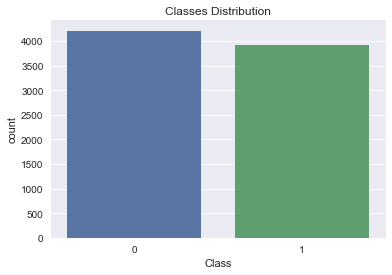

In [6]:
dist = df['class'].value_counts().to_frame().reset_index()

sns.barplot(x='index', y='class', data=dist)
sns.plt.title('Classes Distribution')
plt.ylabel('count')
plt.xlabel('Class')

To get a first insight about the features, let's run some classificatin models that provides feature importance.

In [7]:
X = df.drop(['class'], axis=1)
y = df['class']

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [10]:
def plot_importances(clf, features):
    importances = clf.feature_importances_
    indices = np.argsort(importances)[::-1]
    plt.figure(figsize=(10,5))
    plt.title('Feature importances')
    plt.barh(range(len(importances)), importances[indices], align='center')
    plt.yticks(range(len(importances)), features[indices])
    plt.ylim([-1, len(importances)])
    plt.xlabel('Explained variance')
    plt.show()

1 - Random Forest

In [11]:
from sklearn.ensemble import RandomForestClassifier

clf_rf = RandomForestClassifier(n_estimators=100)
clf_rf.fit(X_train, y_train)
y_pred = clf_rf.predict(X_test)
print('Score: %0.2f' % (accuracy_score(y_test, y_pred) * 100))

Score: 100.00


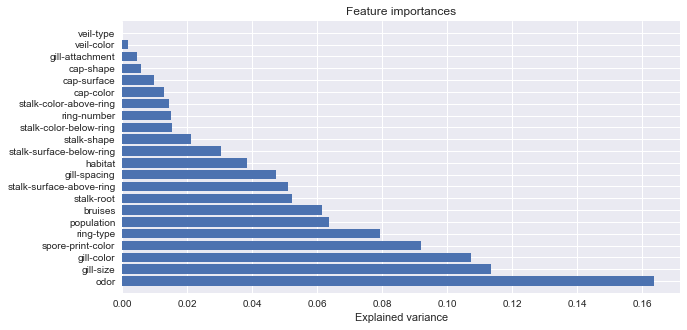

In [12]:
plot_importances(clf_rf, X_train.columns.values)

2 - Decision Tree

In [13]:
from sklearn.tree import DecisionTreeClassifier

clf_dt = DecisionTreeClassifier()
clf_dt.fit(X_train, y_train)
y_pred = clf_dt.predict(X_test)
print('Score: %0.2f' % (accuracy_score(y_test, y_pred) * 100))

Score: 100.00


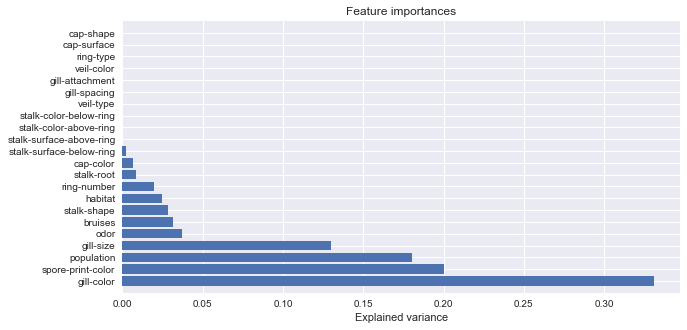

In [14]:
plot_importances(clf_dt, X_train.columns.values)

3 - Gradient Boosting

In [15]:
from sklearn.ensemble import GradientBoostingClassifier

clf_gb = GradientBoostingClassifier()
clf_gb.fit(X_train, y_train)
y_pred = clf_gb.predict(X_test)
print('Score: %0.2f' % (accuracy_score(y_test, y_pred) * 100))

Score: 100.00


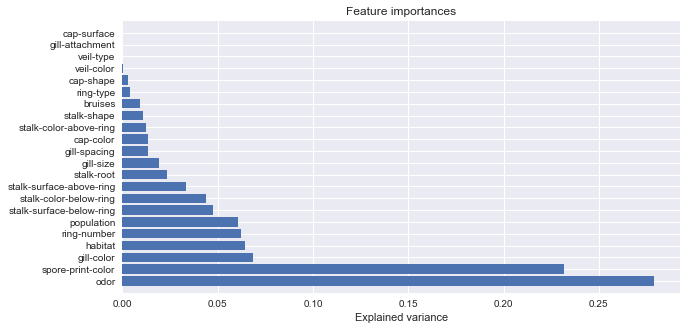

In [16]:
plot_importances(clf_gb, X_train.columns.values)

4 - Ada Boost

In [17]:
from sklearn.ensemble import AdaBoostClassifier

clf_ab = AdaBoostClassifier()
clf_ab.fit(X_train, y_train)
y_pred = clf_ab.predict(X_test)
print('Score: %0.2f' % (accuracy_score(y_test, y_pred) * 100))

Score: 100.00


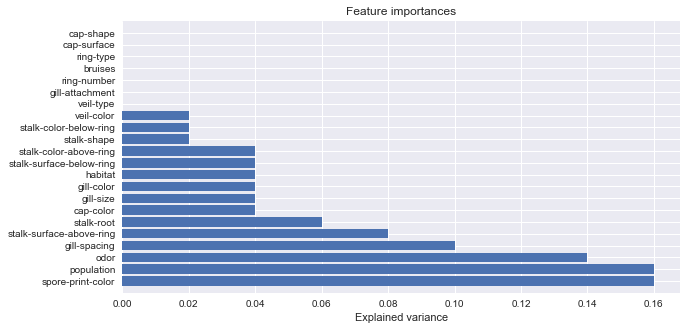

In [18]:
plot_importances(clf_ab, X_train.columns.values)

From that we can see that for all models, except the Decision Tree, *odor*, *spore-print-color* and *population* are among the top features of importance. Let's check the correlation among them.

### Correlation between Features
---

In [19]:
d = pd.read_csv('../Data/mushrooms.csv', usecols=['odor', 'spore-print-color', 'population', 'class'])
d = pd.get_dummies(d)

In [20]:
d.head()

,class_e,class_p,odor_a,odor_c,odor_f,odor_l,odor_m,odor_n,odor_p,odor_s,...,spore-print-color_r,spore-print-color_u,spore-print-color_w,spore-print-color_y,population_a,population_c,population_n,population_s,population_v,population_y
0,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0


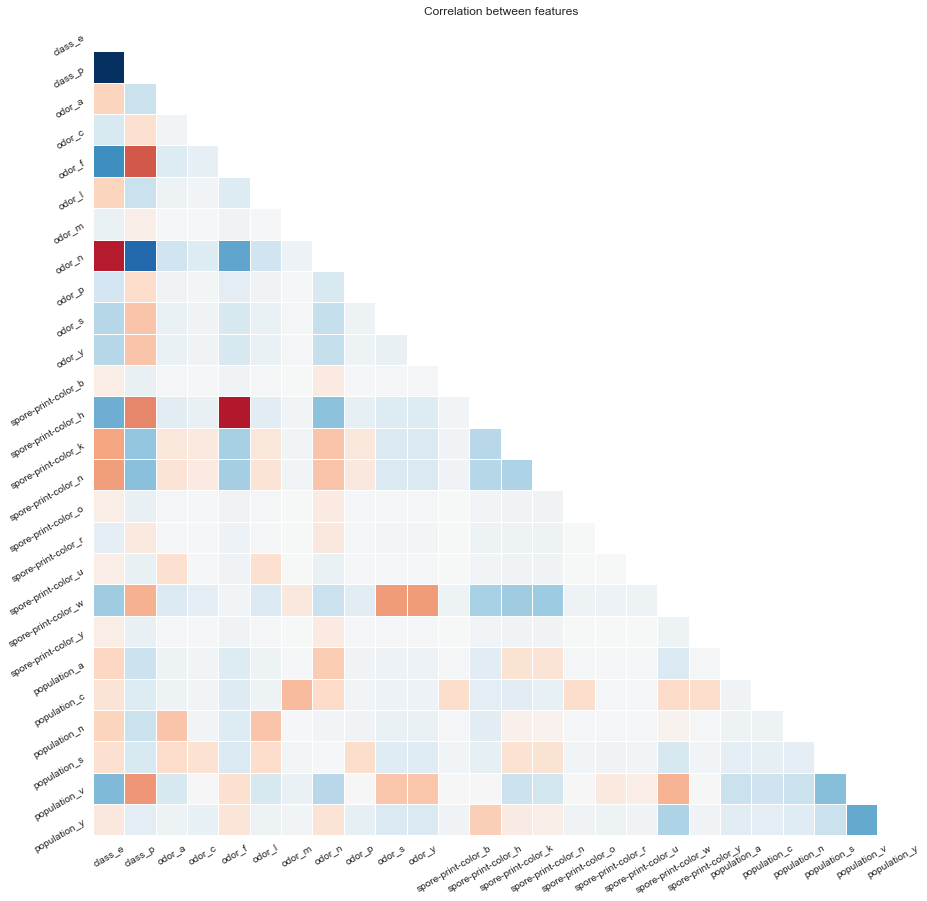

In [21]:
corr = d.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(15, 15))
with sns.axes_style('white'):
    sns.heatmap(corr, mask=mask, linewidths=0.01, square=True, linecolor='white', cbar=False)
plt.xticks(rotation=30)
plt.yticks(rotation=30)
plt.title('Correlation between features')

This means that we may get a good score using just the top features.

### Neural Network
---

In [22]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers.normalization import BatchNormalization
from keras import optimizers

Using TensorFlow backend.


In [23]:
def plot_history(history):
    # list all data in history
    print(history.history.keys())
    # summarize history for accuracy
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='best')
    plt.show()
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='best')

In [24]:
y = pd.get_dummies(df.iloc[:, 0])
X = pd.DataFrame()
for i in df.iloc[:,1:].columns:
    dummies = pd.get_dummies(df[i], prefix=i)
    X = pd.concat([X, dummies], axis=1)

In [25]:
model = Sequential()
model.add(Dense(50, input_shape= (X.shape[1],), kernel_initializer='he_uniform', activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Dense(2, activation='softmax'))
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 50)                5900      
_________________________________________________________________
batch_normalization_1 (Batch (None, 50)                200       
_________________________________________________________________
dropout_1 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 102       
Total params: 6,202
Trainable params: 6,102
Non-trainable params: 100
_________________________________________________________________
None


In [26]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
hist = model.fit(X.values, y.values, batch_size=128, epochs=100, verbose=0, validation_split=0.33)

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


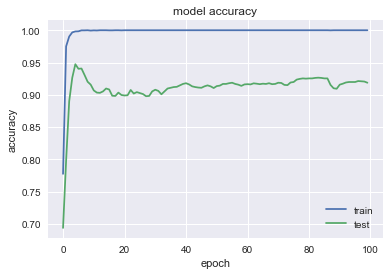

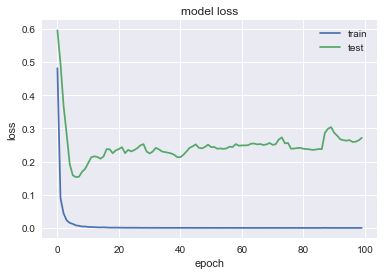

In [27]:
plot_history(hist)

In [28]:
print('Training accuracy: %.2f%% / Validation accuracy: %.2f%%' % (100*hist.history['acc'][-1], 100*hist.history['val_acc'][-1]))

Training accuracy: 100.00% / Validation accuracy: 91.87%
